In [1]:
import numpy as np
import rasterio
import glob
import os
import sys
from rasterio.plot import show
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'output_check')))


In [2]:
cases_dir = '../cases'
input_file = '../configuration/input_tracking.txt'
output_dir = '../processed_sims'
case = 'case_0'

In [3]:
# print files in the output directory
output_dirs = sorted(glob.glob(f"{output_dir}/case_*"))

Output directories found: ['../processed_sims/case_0', '../processed_sims/case_1', '../processed_sims/case_2', '../processed_sims/case_3', '../processed_sims/case_4']
['../processed_sims/case_0/burnscar/case_0_burnscar_0.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_900.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_1800.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_2700.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_3600.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_4500.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_5400.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_6300.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_7200.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_8100.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_9000.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_9900.npy', '../processed_sims/case_0/burnscar/case_0_burnscar_10800.npy', '../processed_sims/case_0/bur

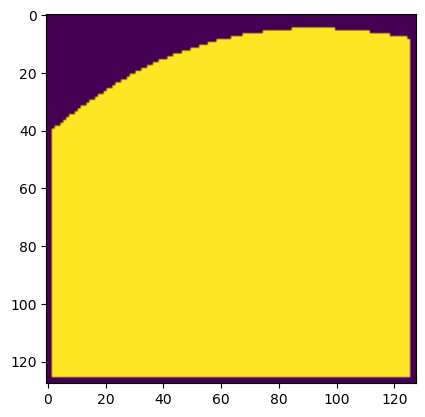

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_259200.npy


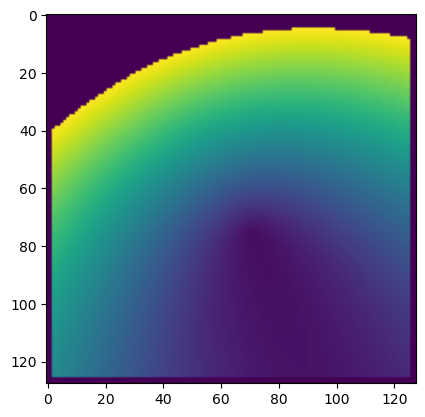

In [4]:
def plot_npy_file(npy_file):
    # Load the numpy array
    data = np.load(npy_file)
    
    # Plot the data
    show(data, cmap='viridis')

def sort_files_by_number(files):
    return sorted(files, key=lambda x: int(''.join(filter(str.isdigit, x))))

# plot the last burnscar file and last toa file for the first case
output_dirs = sorted(glob.glob(f"{output_dir}/case_*"))
print(f"Output directories found: {output_dirs}")
if output_dir:
    first_case_dir = output_dirs[0]
    burnscar_files = sort_files_by_number(glob.glob(f"{first_case_dir}/burnscar/{case}_burnscar_*.npy"))
    toa_files = sort_files_by_number(glob.glob(f"{first_case_dir}/toa/{case}_toa*.npy"))

print(burnscar_files)
print(toa_files)

# plot 259200 burnscar and toa files
if burnscar_files and toa_files:
    burnscar_file = burnscar_files[-1]  # Last burnscar file
    toa_file = toa_files[-1]  # Last toa file
    
    print(f"Plotting burnscar file: {burnscar_file}")
    plot_npy_file(burnscar_file)
    
    print(f"Plotting toa file: {toa_file}")
    plot_npy_file(toa_file)




Simulation outputs for case 0: ['../cases/case_0/flin_0000001_0259239.tif', '../cases/case_0/time_of_arrival_0000001_0259239.tif', '../cases/case_0/vs_0000001_0259239.tif']


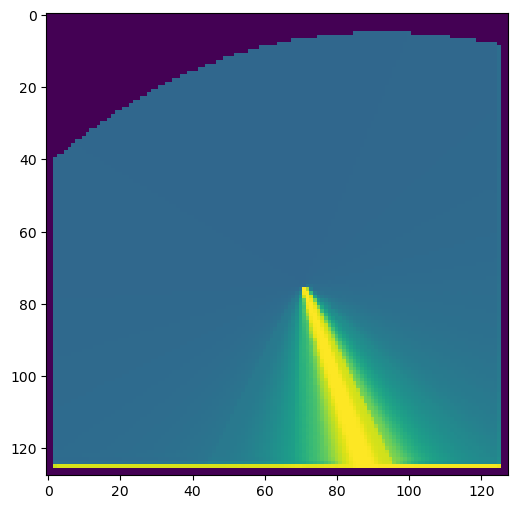

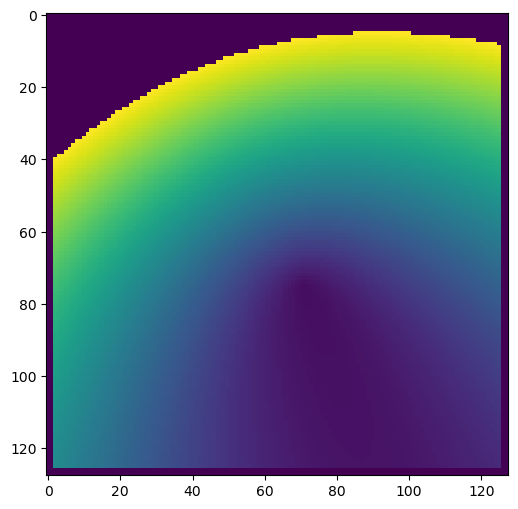

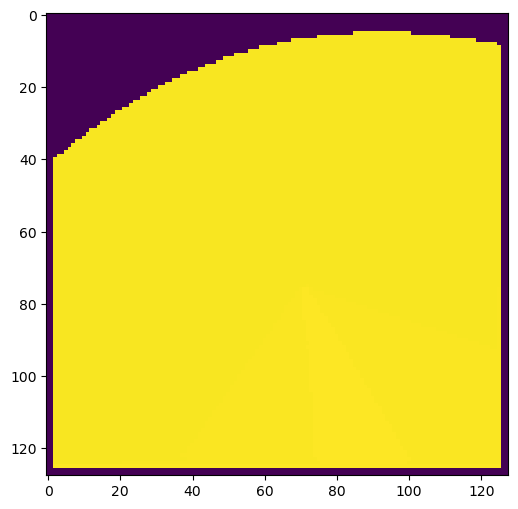

In [9]:
case_num = 0

sim_outputs = sorted(glob.glob(f"../cases/case_{case_num}/*.tif"))
if sim_outputs:
    print(f"Simulation outputs for case {case_num}: {sim_outputs}")
    for output_file in sim_outputs:
        with rasterio.open(output_file) as src:
            data = src.read(1)
            plt.figure(figsize=(10, 6))
            show(data, cmap='viridis')

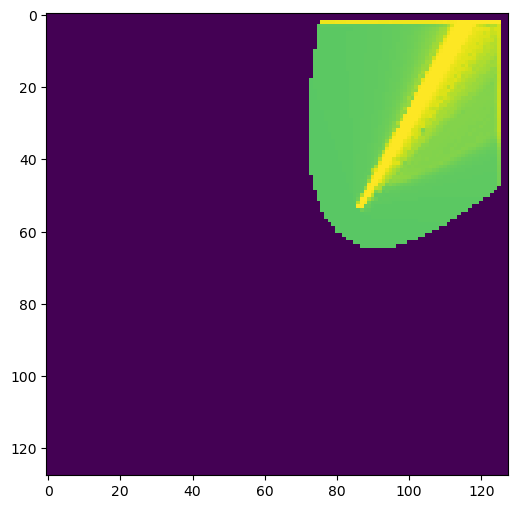

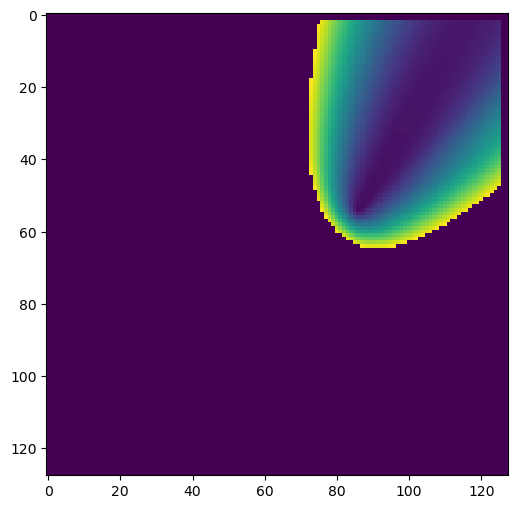

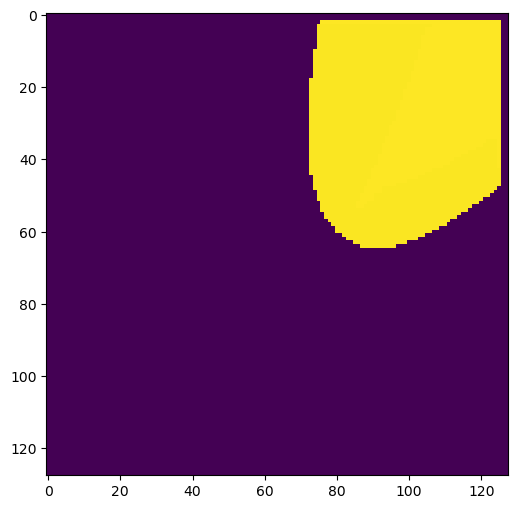

In [6]:
# plot rasters from ../../01-constant-wind/outputs
output_rasters = sorted(glob.glob("../../01-constant-wind/outputs/*.tif"))
if output_rasters:
    for raster_file in output_rasters:
        with rasterio.open(raster_file) as src:
            data = src.read(1)
            plt.figure(figsize=(10, 6))
            show(data, cmap='viridis')
        

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_0.npy


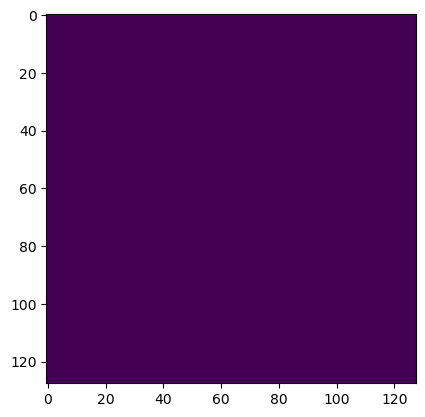

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_0.npy


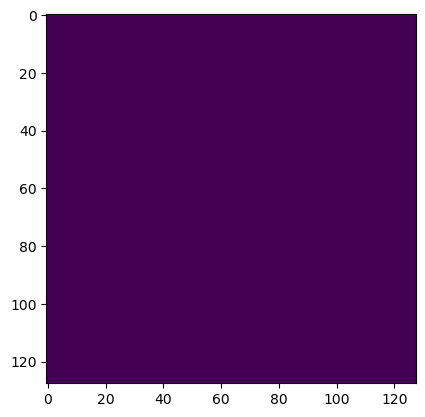

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_28800.npy


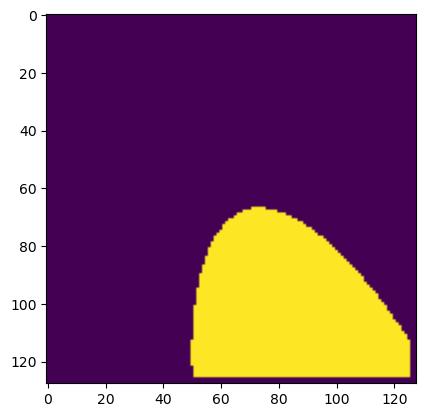

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_28800.npy


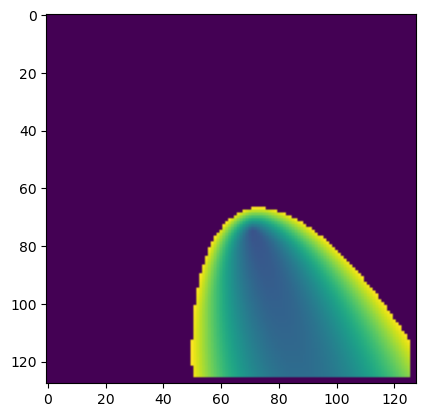

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_57600.npy


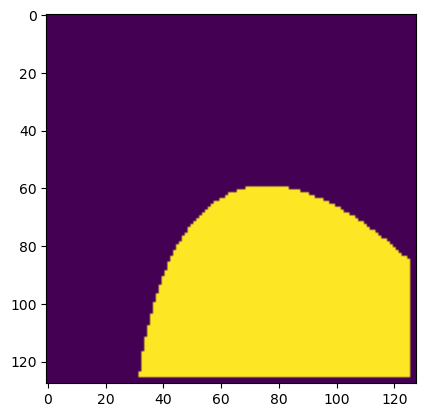

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_57600.npy


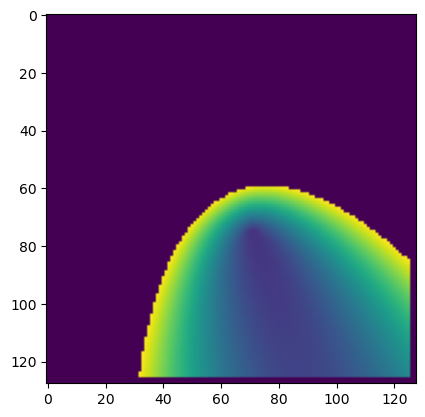

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_86400.npy


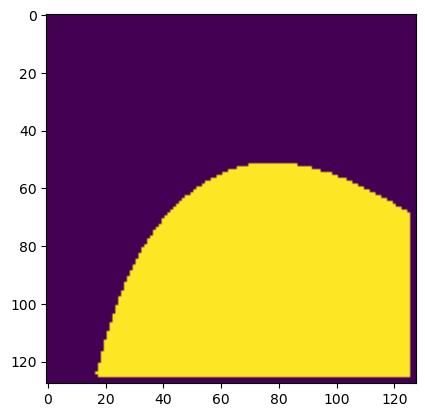

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_86400.npy


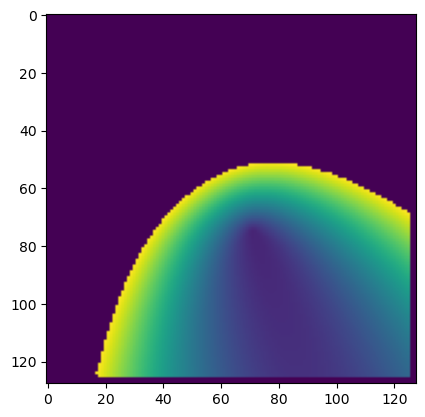

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_115200.npy


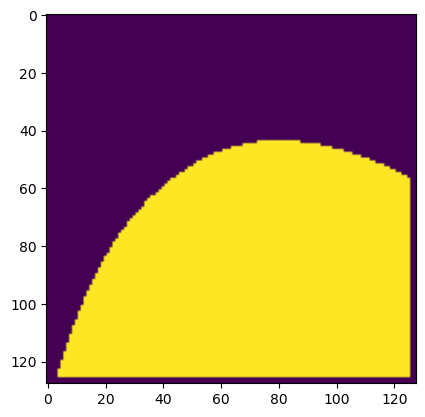

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_115200.npy


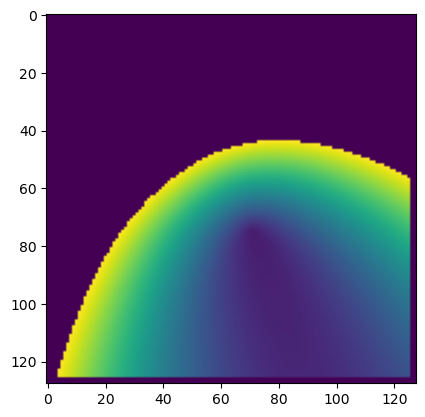

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_144000.npy


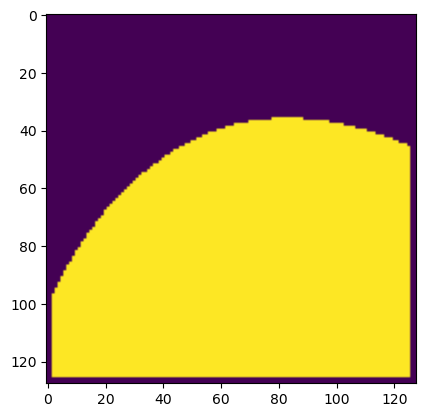

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_144000.npy


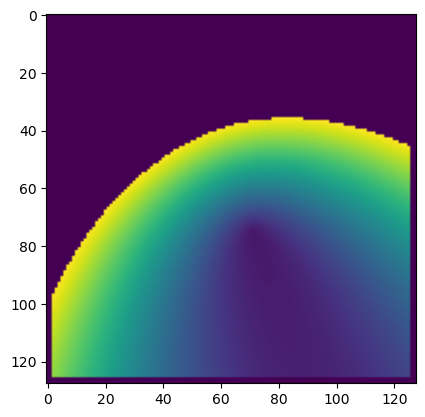

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_172800.npy


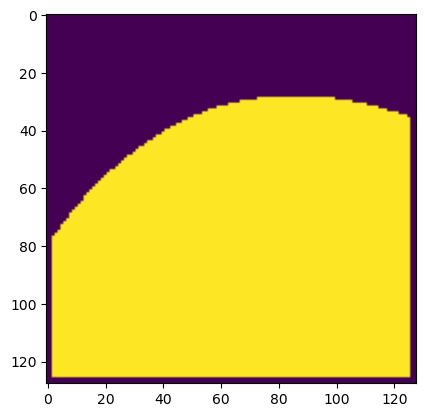

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_172800.npy


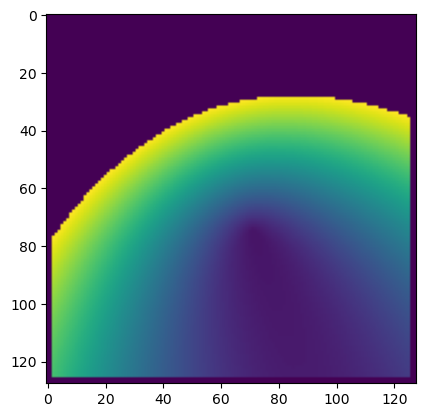

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_201600.npy


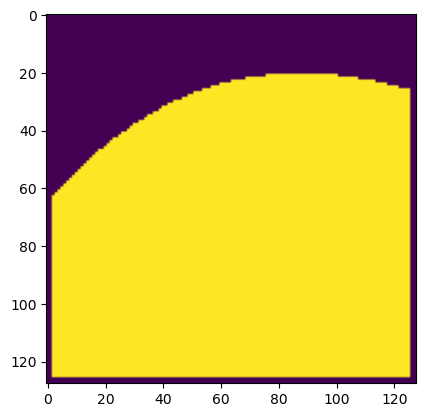

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_201600.npy


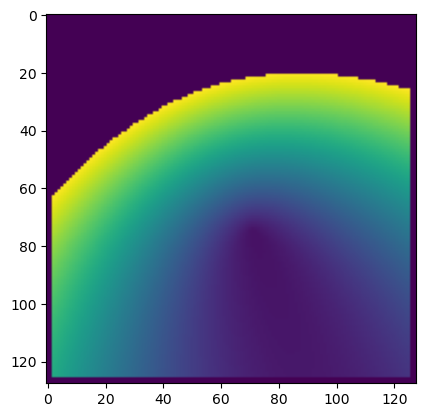

Plotting burnscar file: ../processed_sims/case_0/burnscar/case_0_burnscar_230400.npy


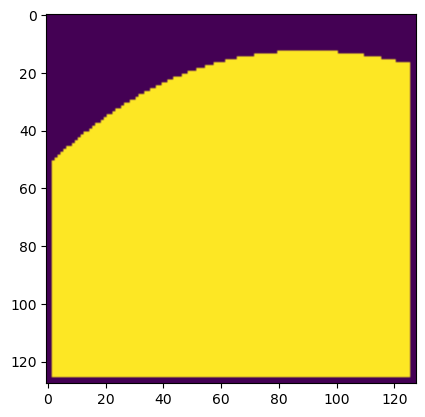

Plotting toa file: ../processed_sims/case_0/toa/case_0_toa_230400.npy


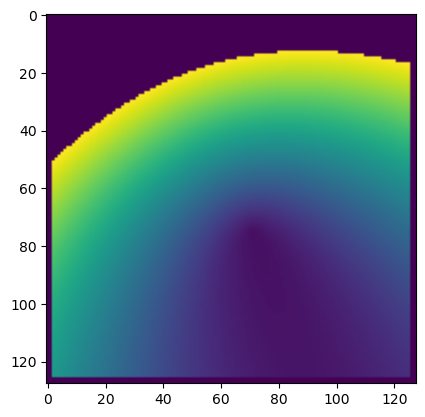

In [7]:
# for each 8 hours, plot the burnscar and toa files, so plot 0 and then 8hr into the future
# so that would be case_4_burnscar_0.npy and case_4_toa_0.npy, then case_4_burnscar_8*3600.npy and case_4_toa_8*3600.npy, etc.
if burnscar_files and toa_files:
    for i in range(0, 259200, 28800):  # 28800 seconds = 8 hours
        burnscar_file = f"{first_case_dir}/burnscar/{case}_burnscar_{i}.npy"
        toa_file = f"{first_case_dir}/toa/{case}_toa_{i}.npy"
        
        if os.path.exists(burnscar_file):
            print(f"Plotting burnscar file: {burnscar_file}")
            plot_npy_file(burnscar_file)
        
        if os.path.exists(toa_file):
            print(f"Plotting toa file: {toa_file}")
            plot_npy_file(toa_file)

In [8]:
# size of npy grids
if burnscar_files and toa_files:
    burnscar_shape = np.load(burnscar_files[0]).shape
    toa_shape = np.load(toa_files[0]).shape
    print(f"Burnscar grid shape: {burnscar_shape}")
    print(f"TOA grid shape: {toa_shape}")

Burnscar grid shape: (128, 128)
TOA grid shape: (128, 128)
